In [512]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [513]:
df = pd.read_csv('./fy23-adopted-operating-budget.csv')
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all')
df = df.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# edit column name to make it make sense
df.rename(columns = {'Program   ':'Program'}, inplace = True)

# get rid of commas
df['FY20 Actual Expense']=df['FY20 Actual Expense'].str.replace(',','')
df['FY21 Actual Expense']=df['FY21 Actual Expense'].str.replace(',','')
df['FY22 Appropriation'] = df['FY22 Appropriation'].str.replace(',','')
df['FY23 Adopted'] = df['FY23 Adopted'].str.replace(',','')

# change str to floats
df['FY20 Actual Expense'] = df['FY20 Actual Expense'].replace(['#Missing'],[0]).astype(float)
df['FY21 Actual Expense'] = df['FY21 Actual Expense'].replace(['#Missing'],[0]).astype(float)
df['FY22 Appropriation'] = df['FY22 Appropriation'].replace(['#Missing'],[0]).astype(float)
df['FY23 Adopted'] = df['FY23 Adopted'].replace(['#Missing'],[0]).astype(float)

In [514]:
# budget per department
dept_df = df.groupby(['Dept'], as_index=False).sum(numeric_only=True)

In [515]:
dept_df

,Dept,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
0,Age Strong,3.875010e+06,3.883953e+06,5.260522e+06,6.002116e+06
1,Annual Audit Costs,1.310973e+06,1.428500e+05,7.500000e+05,7.500000e+05
2,Assessing Department,6.670361e+06,7.347193e+06,8.078874e+06,8.223350e+06
3,Auditing Department,2.996263e+06,3.132300e+06,3.064945e+06,3.255491e+06
4,Black Male Advancement,0.000000e+00,0.000000e+00,0.000000e+00,1.803768e+06
5,Boston Center for Youth & Families,2.854547e+07,2.690486e+07,2.971314e+07,2.979489e+07
6,Boston Public Schools,1.178562e+09,1.260465e+09,1.294720e+09,1.334846e+09
7,Boston VETS,2.900756e+06,2.607980e+06,4.620844e+06,4.696769e+06
8,Budget Management,2.827299e+06,2.833402e+06,3.538791e+06,3.355258e+06
9,Cemetery Division,2.349289e+06,2.555154e+06,2.624029e+06,2.702418e+06


In [516]:
print(df.dtypes)

Cabinet                 object
Dept                    object
Program                 object
Expense Category        object
FY20 Actual Expense    float64
FY21 Actual Expense    float64
FY22 Appropriation     float64
FY23 Adopted           float64
dtype: object


In [517]:
total = df['FY20 Actual Expense'].sum()
print(total)

3484771512.0


In [518]:
print(dept_df.index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [519]:
pd.options.display.max_rows = 100
print(dept_df['Dept'])







0                                         Age Strong
1                                 Annual Audit Costs
2                               Assessing Department
3                                Auditing Department
4                             Black Male Advancement
5                 Boston Center for Youth & Families
6                              Boston Public Schools
7                                        Boston VETS
8                                  Budget Management
9                                  Cemetery Division
10                          Central Fleet Management
11                            Charter School Tuition
12                                        City Clerk
13                                      City Council
14             Commission For Persons W/Disabilities
15                      Consumer Affairs & Licensing
16                                      Debt Service
17           Department of Innovation and Technology
18    Department of Supplier and Workforce Div

In [520]:
row_63 = dept_df.iloc[63] # 63rd row has index 62 (0-based indexing)
print(row_63)

Dept                   Police Department
FY20 Actual Expense          425553214.0
FY21 Actual Expense          422917500.0
FY22 Appropriation           400306189.0
FY23 Adopted                 395094796.0
Name: 63, dtype: object


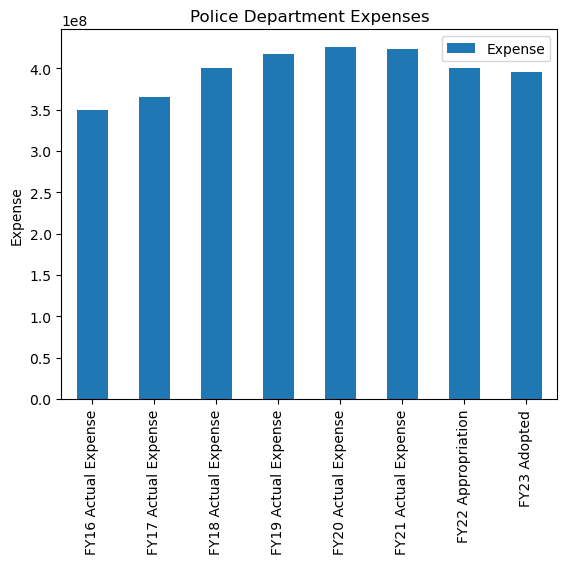

In [521]:
import pandas as pd
import matplotlib.pyplot as plt

# define the data as a dictionary
data = {'Expense': [348887844.0,364594820.0,399924493.0,416762373.0,425553214.0, 422917500.0, 400306189.0, 395094796.0]}
labels = ['FY16 Actual Expense','FY17 Actual Expense','FY18 Actual Expense','FY19 Actual Expense','FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation', 'FY23 Adopted']

# create a pandas dataframe from the dictionary
df = pd.DataFrame(data, index=labels)

# convert the data to a numeric type
df['Expense'] = pd.to_numeric(df['Expense'])

# plot the bar graph
ax = df.plot(kind='bar')
ax.set_title('Police Department Expenses')
ax.set_ylabel('Expense')

# show the plot
plt.show()


In [522]:
from matplotlib import font_manager

font_dir = ['/Users/henry/Downloads/GTAmerica Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_dir = ['/Users/henry/Downloads/Century Schoolbook Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
font_dir = ['/Users/henry/Downloads/GTAmerica Font Bold']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [523]:
plt.rcParams['font.family'] = 'GT America'

In [524]:
plt.rcParams['font.family'] = 'Century Schoolbook'

[348887844.0, 364594820.0, 399924493.0, 416762373.0, 425553214.0, 422917500.0, 400306189.0, 395094796.0]


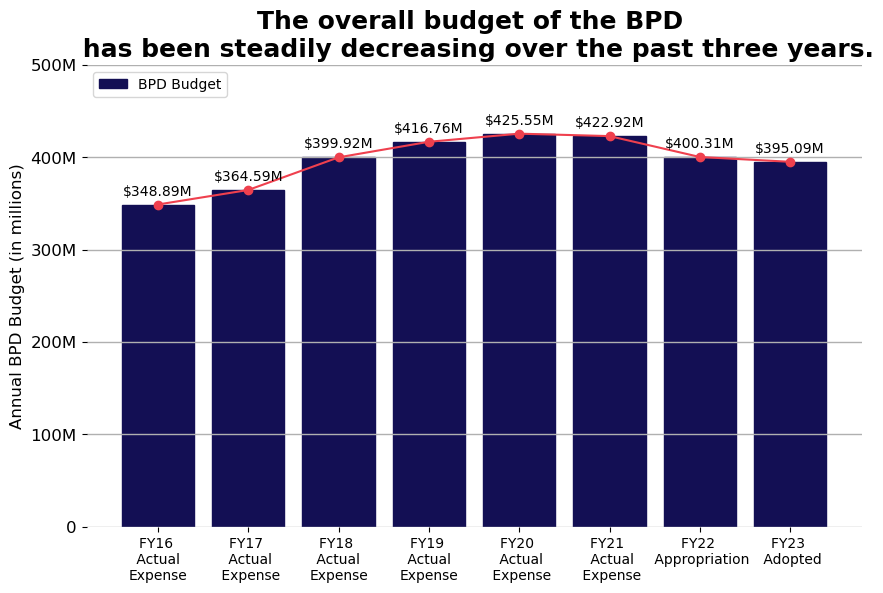

In [528]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

data = [348887844.0,364594820.0,399924493.0,416762373.0,425553214.0, 422917500.0, 400306189.0, 395094796.0]
labels = ['FY16 \n Actual \nExpense','FY17 \n Actual\n Expense','FY18 \n Actual \nExpense','FY19 \n Actual \nExpense','FY20 \n Actual\n Expense', 'FY21 \n Actual\n Expense', 'FY22 \n Appropriation', 'FY23 \n Adopted']

ax.bar(labels, data, color='#130F54', edgecolor='#130F54', label='BPD Budget')

# Add trend line
x = np.arange(len(labels))
z = np.polyfit(x, data, 1)
p = np.poly1d(z)
print(data)
#ax.plot(labels, p(x), 'r--')
#ax.bar(data, labels)
ax.plot(labels,data, '-o', color='#EF404E')

# Highlight bar values
for i, v in enumerate(data):
    ax.text(i, v+10**7, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(np.arange(0, 500000001, 100000000))
ax.set_yticklabels(['0', '100M', '200M', '300M', '400M', '500M'], fontsize=12)

plt.grid(axis='y', linewidth=1)
plt.title('The overall budget of the BPD \n has been steadily decreasing over the past three years.', 
          fontweight="bold", fontsize=18)
plt.ylabel('Annual BPD Budget (in millions)', fontsize=12)
plt.legend(loc='upper left')


plt.savefig('q1.png', dpi=300, bbox_inches='tight')
plt.show()

In [529]:
# converts entry values in to integers
dept_df['FY20 Actual Expense'] = dept_df['FY20 Actual Expense'].astype(int)
dept_df['FY21 Actual Expense'] = dept_df['FY21 Actual Expense'].astype(int)
dept_df['FY22 Appropriation'] = dept_df['FY22 Appropriation'].astype(int)
dept_df['FY23 Adopted'] = dept_df['FY23 Adopted'].astype(int)


In [530]:
#printing top 6 dept in thr year 2023
top_6_23 = dept_df.nlargest(6, 'FY23 Adopted')
top_6_23

,Dept,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
6,Boston Public Schools,1178562373,1260465248,1294719861,1334845508
63,Police Department,425553214,422917500,400306189,395094796
61,Pensions,280602756,292088778,323684235,353855931
25,Fire Department,277013028,268959926,275808106,276902589
11,Charter School Tuition,199702437,217698388,251621487,264549478
16,Debt Service,177983967,172304217,203685927,218997990


In [531]:
top_6_22 = dept_df.nlargest(6, 'FY22 Appropriation')
top_6_22

,Dept,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
6,Boston Public Schools,1178562373,1260465248,1294719861,1334845508
63,Police Department,425553214,422917500,400306189,395094796
61,Pensions,280602756,292088778,323684235,353855931
25,Fire Department,277013028,268959926,275808106,276902589
11,Charter School Tuition,199702437,217698388,251621487,264549478
26,Health Insurance,211341951,210900841,212236570,217310394


In [532]:
top_6_21 = dept_df.nlargest(6, 'FY21 Actual Expense')
top_6_21

,Dept,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
6,Boston Public Schools,1178562373,1260465248,1294719861,1334845508
63,Police Department,425553214,422917500,400306189,395094796
61,Pensions,280602756,292088778,323684235,353855931
25,Fire Department,277013028,268959926,275808106,276902589
11,Charter School Tuition,199702437,217698388,251621487,264549478
26,Health Insurance,211341951,210900841,212236570,217310394


In [533]:
top_6_20 = dept_df.nlargest(6, 'FY20 Actual Expense')
top_6_20

,Dept,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
6,Boston Public Schools,1178562373,1260465248,1294719861,1334845508
63,Police Department,425553214,422917500,400306189,395094796
61,Pensions,280602756,292088778,323684235,353855931
25,Fire Department,277013028,268959926,275808106,276902589
26,Health Insurance,211341951,210900841,212236570,217310394
11,Charter School Tuition,199702437,217698388,251621487,264549478


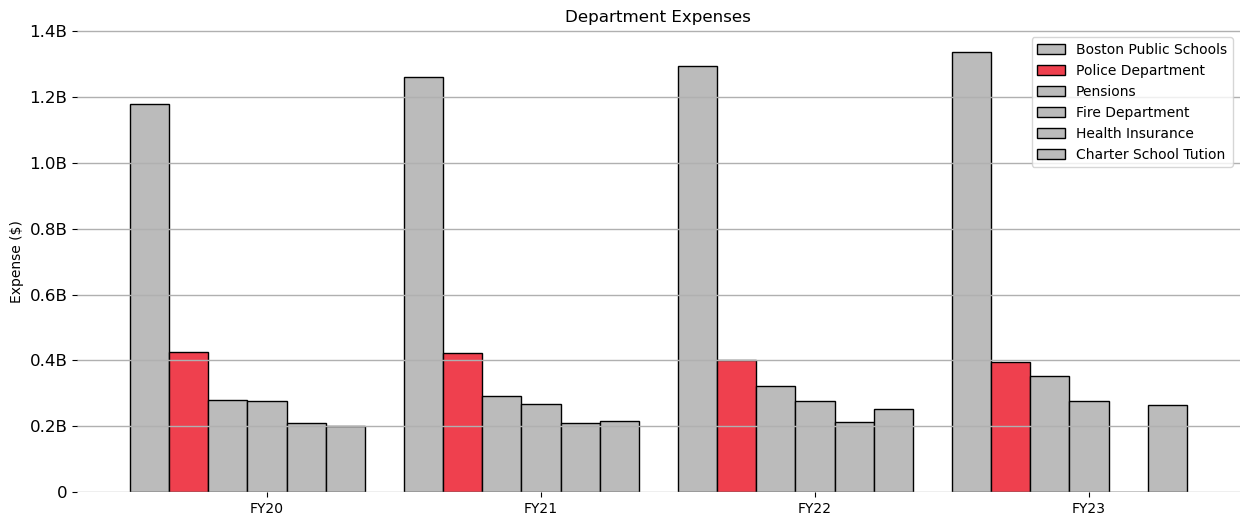

In [549]:
#this graph is for testing

import matplotlib.pyplot as plt
import numpy as np

# Data
departments = ['Boston Public Schools', 'Police Department', 'Pensions', 'Fire Department', 'Health Insurance', 'Charter School Tution']
fy20_expense = [1178562373, 425553214, 280602756, 277013028, 211341951, 199702437]
fy21_expense = [1260465248, 422917500, 292088778, 268959926, 210900841, 217698388]
fy22_appropriation = [1294719861, 400306189, 323684235, 275808106, 212236570, 251621487]
fy23_adopted = [1334845508, 395094796, 353855931, 276902589, 0, 264549478]

# Combine data
years = ['FY20', 'FY21', 'FY22', 'FY23']
data = [fy20_expense, fy21_expense, fy22_appropriation, fy23_adopted]

# Plot
fig, ax = plt.subplots(figsize=(15, 6))

for i, dept in enumerate(departments):
    if dept == 'Police Department':
        color = '#EF404E'
    else:
        color = '#BBBBBB'
    ax.bar([j*1.4+i*0.2 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=color,edgecolor='black')

    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*1.4+0.6 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Expense ($)')
ax.set_title('Department Expenses')

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 1400000001, 200000000))
ax.set_yticklabels(['0', '0.2B', '0.4B', '0.6B', '0.8B', '1.0B','1.2B', '1.4B'], fontsize=12)
plt.grid(axis='y', linewidth=1)

# Legend
ax.legend()

plt.show()


In [224]:
# this is the code with updated values
# in the year 2023 health insurance was not in criteria of top 6. it was over taken by debt services
# in the year 2023 we made the value of health insurance to 0 as it was not in the top 6

In [534]:
departments = ['Boston Public Schools', 'Police Department', 'Pensions', 'Fire Department', 'Health Insurance', 'Charter School Tution']
fy20_expense = [1178562373, 425553214, 280602756, 277013028, 211341951, 199702437]
fy21_expense = [1260465248, 422917500, 292088778, 268959926, 210900841, 217698388]
fy22_appropriation = [1294719861, 400306189, 323684235, 275808106, 212236570, 251621487]
fy23_adopted = [1334845508, 395094796, 353855931, 276902589, 0, 264549478]

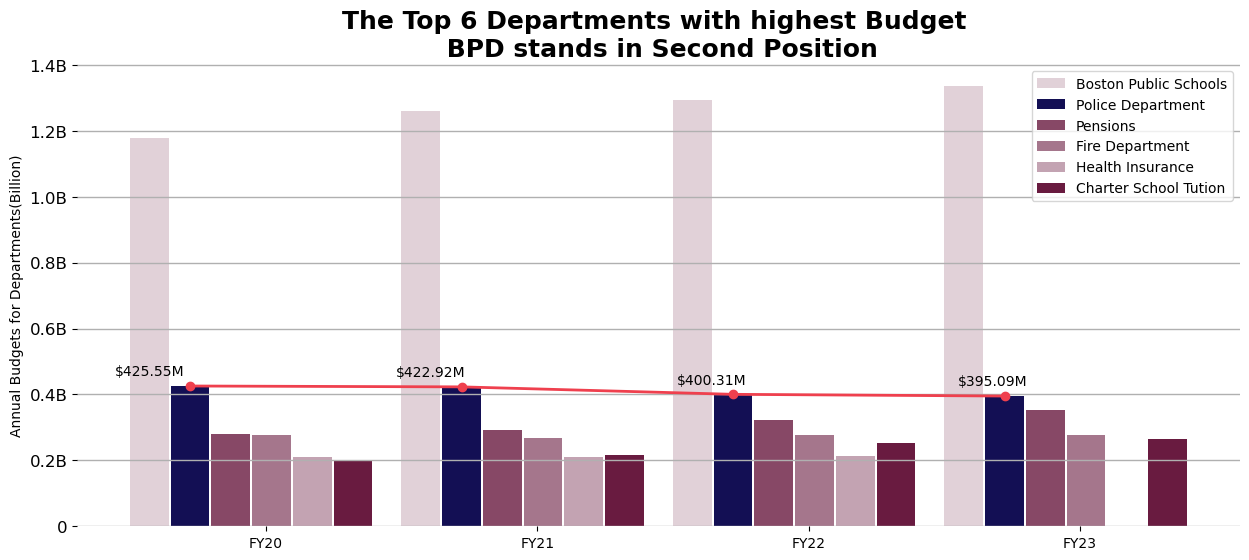

In [535]:
import matplotlib.pyplot as plt
import numpy as np

# Data
departments = ['Boston Public Schools', 'Police Department', 'Pensions', 'Fire Department', 'Health Insurance', 'Charter School Tution']
fy20_expense = [1178562373, 425553214, 280602756, 277013028, 211341951, 199702437]
fy21_expense = [1260465248, 422917500, 292088778, 268959926, 210900841, 217698388]
fy22_appropriation = [1294719861, 400306189, 323684235, 275808106, 212236570, 251621487]
fy23_adopted = [1334845508, 395094796, 353855931, 276902589, 0, 264549478]

# Combine data
years = ['FY20', 'FY21', 'FY22', 'FY23']
data = [fy20_expense, fy21_expense, fy22_appropriation, fy23_adopted]

# Define colors
#colors = ['#d175a2', '#bf6390', '#b04c7d', '#ad2a69', '#912056', '#691B40']
colors = ['#E1D1D8','#783153','#874866', '#A5768C', '#C3A3B2','#691b40']

# Plot
fig, ax = plt.subplots(figsize=(15, 6))

for i, dept in enumerate(departments):
    if dept != 'Police Department':
        ax.bar([j*1.4+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=colors[i])
    else:
        ax.bar([j*1.4+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color='#130F54')
        x_vals = [j*1.4+i*0.21 for j in range(len(years))]
        
        y_vals = [data[j][i] for j in range(len(years))]
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax.plot(x_vals, y_vals, '-o', color='#EF404E', linewidth=2) 

for i, v in enumerate(y_vals):
    ax.text(i*1.45, v+10**7.5, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=10)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*1.4+0.6 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Annual Budgets for Departments(Billion)')
ax.set_title('The Top 6 Departments with highest Budget \n BPD stands in Second Position',fontweight='bold',fontsize=18)

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 1400000001, 200000000))
ax.set_yticklabels(['0', '0.2B', '0.4B', '0.6B', '0.8B', '1.0B','1.2B', '1.4B'], fontsize=12)
plt.grid(axis='y', linewidth=1)

# Legend
ax.legend()
plt.savefig('q2.png', dpi=300, bbox_inches='tight')

plt.show()


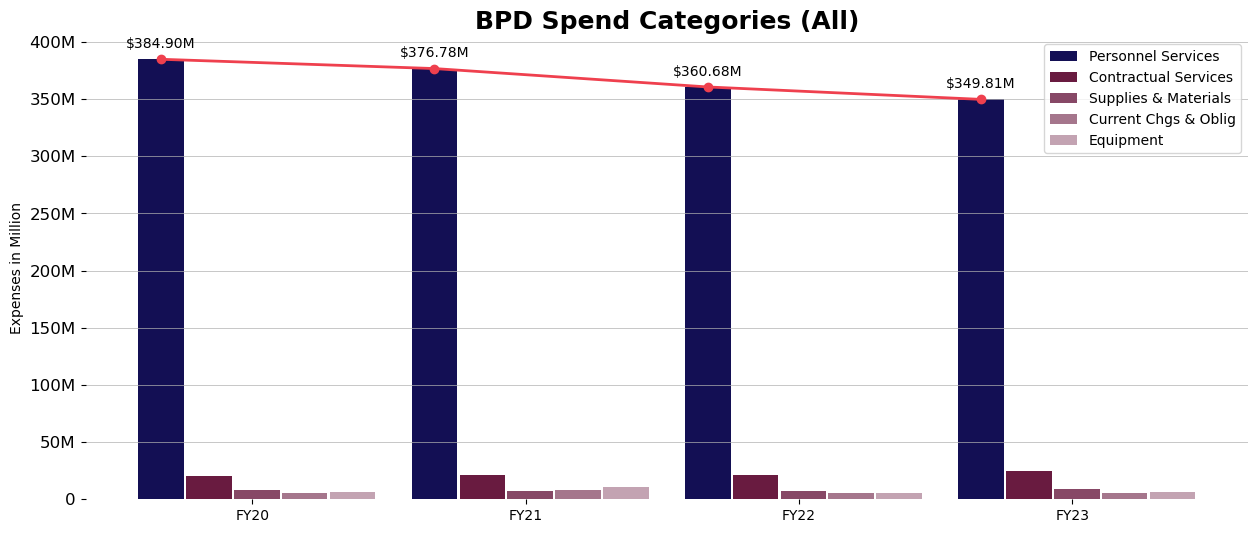

In [536]:
import numpy as np
import matplotlib.pyplot as plt

spend_categories = ['Personnel Services', 'Contractual Services', 'Supplies & Materials', 'Current Chgs & Oblig', 'Equipment']
fy20_expense = [384896992, 20657551, 8437198, 5450466, 6111001]
fy21_expense = [376776322, 20879094, 6877106, 7870088, 10514888]
fy22_appropriation = [360681132, 20955246, 7661121, 5281135, 5872670]
fy23_adopted = [349814357, 24853867, 8792829, 5529868, 6103875]

years = ['FY20', 'FY21', 'FY22', 'FY23']
data = [fy20_expense, fy21_expense, fy22_appropriation, fy23_adopted]

# Define colors
colors = ['#E1D1D8','#691b40', '#874866', '#A5768C','#C3A3B2']

# Plot
fig, ax = plt.subplots(figsize=(15, 6))

for i, dept in enumerate(spend_categories):
    if dept != 'Personnel Services':
        ax.bar([j*1.2+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=colors[i])
    else:
        ax.bar([j*1.2+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color='#130F54')
        x_vals = [j*1.2+i*0.21 for j in range(len(years))]
        
        y_vals = [data[j][i] for j in range(len(years))]
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax.plot(x_vals, y_vals, '-o', color='#EF404E', linewidth=2) # Add trend line to personnel services bars

for i, v in enumerate(y_vals):
    ax.text(i*1.2, v+10**7, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=10)
        
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*1.2+0.4 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Expenses in Million')
ax.set_title('BPD Spend Categories (All)',fontweight='bold',fontsize=18)

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 400000001, 50000000))
ax.set_yticklabels(['0', '50M', '100M', '150M', '200M', '250M', '300M', '350M', '400M'], fontsize=12)
plt.grid(axis='y', linewidth=0.5)

# Legend
ax.legend()
# Find the highest value in data

plt.savefig('q3A.png', dpi=300, bbox_inches='tight')
plt.show()


[20657551, 20879094, 20955246, 24853867]


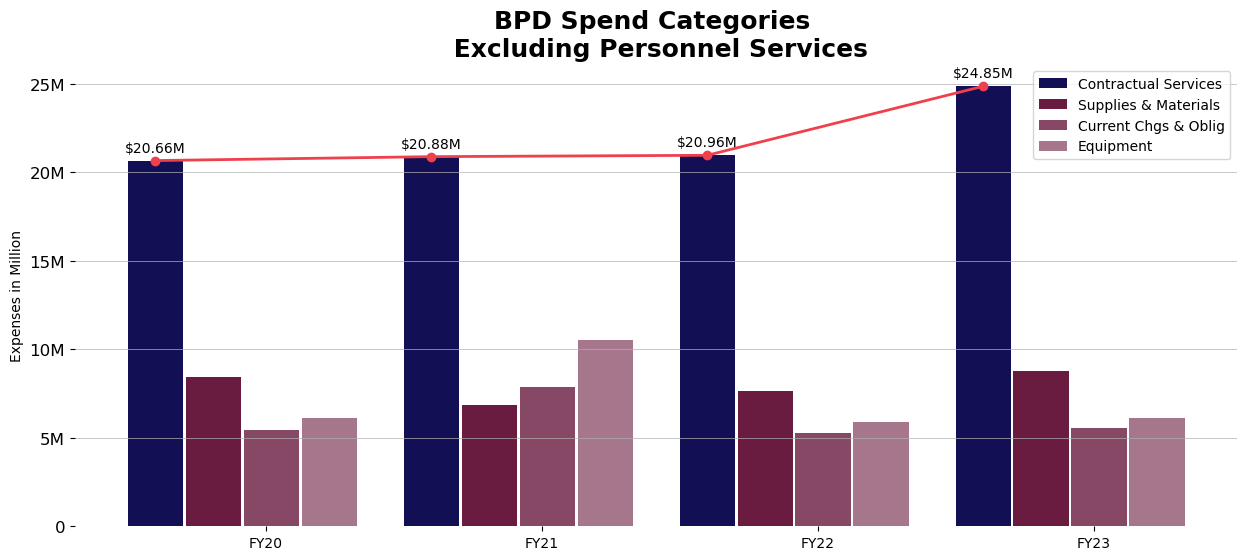

In [537]:
import numpy as np
import matplotlib.pyplot as plt
from array import array

spend_categories = ['Contractual Services', 'Supplies & Materials', 'Current Chgs & Oblig', 'Equipment']
fy20_expense = [20657551, 8437198, 5450466, 6111001]
fy21_expense = [20879094, 6877106, 7870088, 10514888]
fy22_appropriation = [20955246, 7661121, 5281135, 5872670]
fy23_adopted = [24853867, 8792829, 5529868, 6103875]

years = ['FY20', 'FY21', 'FY22', 'FY23']
data = [fy20_expense, fy21_expense, fy22_appropriation, fy23_adopted]

# Define colors
colors = [ '#b04c7d', '#691b40', '#874866', '#A5768C']

# Plot
fig, ax = plt.subplots(figsize=(15, 6))

for i, dept in enumerate(spend_categories):
    if dept != 'Contractual Services':
        ax.bar([j*1.0+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=colors[i])
    else:
        ax.bar([j*1.0+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color='#130F54')
        x_vals =([j*1.0 for j in range(len(years))])
        y_vals = [data[j][i] for j in range(len(years))]
        res = np.array([0,1,2,3])
        print(y_vals)
        z = np.polyfit(res, y_vals, 1)
        p = np.poly1d(z)
        ax.plot(res, y_vals, '-o', color='#EF404E', linewidth=2) # Add trend line to personnel services bars

'''
x = np.arange(len(labels))
z = np.polyfit(x, data, 1)
p = np.poly1d(z)'''


# Highlight bar values
for i, v in enumerate(y_vals):
    ax.text(i, v+6.5**7, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=10)
        
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*1.0+0.4 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Expenses in Million')
ax.set_title('BPD Spend Categories \n Excluding Personnel Services',fontweight='bold',fontsize=18)

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 30000000, 5000000))
ax.set_yticklabels(['0', '5M', '10M', '15M', '20M', '25M'], fontsize=12)
plt.grid(axis='y', linewidth=0.5)

# Legend
ax.legend()



plt.savefig('q3B.png', dpi=300, bbox_inches='tight')

plt.show()


FY: 18 [20431, 3173]
FY: 19 [20040, 3271]
FY: 20 [18715, 3142]
FY: 21 [19457, 3094]
[3173, 3271, 3142, 3094]


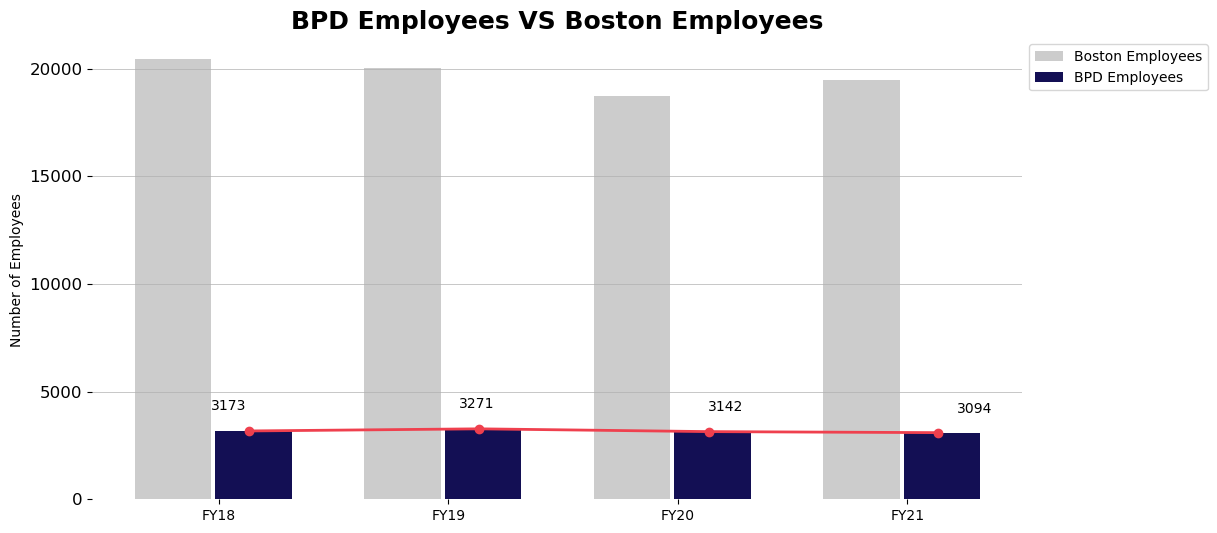

In [544]:
import numpy as np
import matplotlib.pyplot as plt
from array import array

employees = ['Boston Employees', 'BPD Employees']
fy21_emp = [22551-3094,3094]
fy20_emp = [21857-3142,3142]
fy19_emp = [23311-3271, 3271]
fy18_emp = [23604-3173,3173]

years = ['FY18', 'FY19', 'FY20', 'FY21']
data = [fy18_emp,fy19_emp,fy20_emp,fy21_emp]
j=0
for i in range(18,22):
    print("FY:",i,data[j])
    j=j+1

# Define colors
colors = [ '#CCCCCC', '#FCAA17']

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, dept in enumerate(employees):
    if dept == 'BPD Employees':
        ax.bar([j*0.6+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color='#130F54')
        x_vals =([j*0.6+0.2 for j in range(len(years))])
        y_vals = [data[j][i] for j in range(len(years))]
        print(y_vals)
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax.plot(x_vals, y_vals, '-o', color='#EF404E', linewidth=2) # Add trend line to personnel services bars

    else:
        ax.bar([j*0.6+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=colors[0])
        
'''
x = np.arange(len(labels))
z = np.polyfit(x, data, 1)
p = np.poly1d(z)'''



# Highlight bar values
for i, v in enumerate(y_vals):
    #ax.text(i*0.6, v+2.5**7, "${:,.2f}".format(v)+"M", ha='center', fontsize=10)
    ax.text(i*0.65+0.145, v*1.3, str(y_vals[i]), ha='center', fontsize=10)

        
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*0.6+0.12 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Number of Employees ')
ax.set_title('BPD Employees VS Boston Employees',fontweight='bold',fontsize=18)

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 25000, 5000))
ax.set_yticklabels(['0','5000', '10000', '15000', '20000'], fontsize=12)
plt.grid(axis='y', linewidth=0.5)

# Legend
#ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0)) # set legend to the right of the plot



plt.savefig('q5A.png', dpi=300, bbox_inches='tight')

plt.show()


In [548]:
'''
Number of Police Officers in 2021: 1321
Number of Police Officers in 2020: 1355
Number of Police Officers in 2019: 1346
Number of Police Officers in 2018: 1334
'''

'\nNumber of Police Officers in 2021: 1321\nNumber of Police Officers in 2020: 1355\nNumber of Police Officers in 2019: 1346\nNumber of Police Officers in 2018: 1334\n'

FY: 18 [22270, 1334]
FY: 19 [21965, 1346]
FY: 20 [20502, 1355]
FY: 21 [21230, 1321]
[1334, 1346, 1355, 1321]


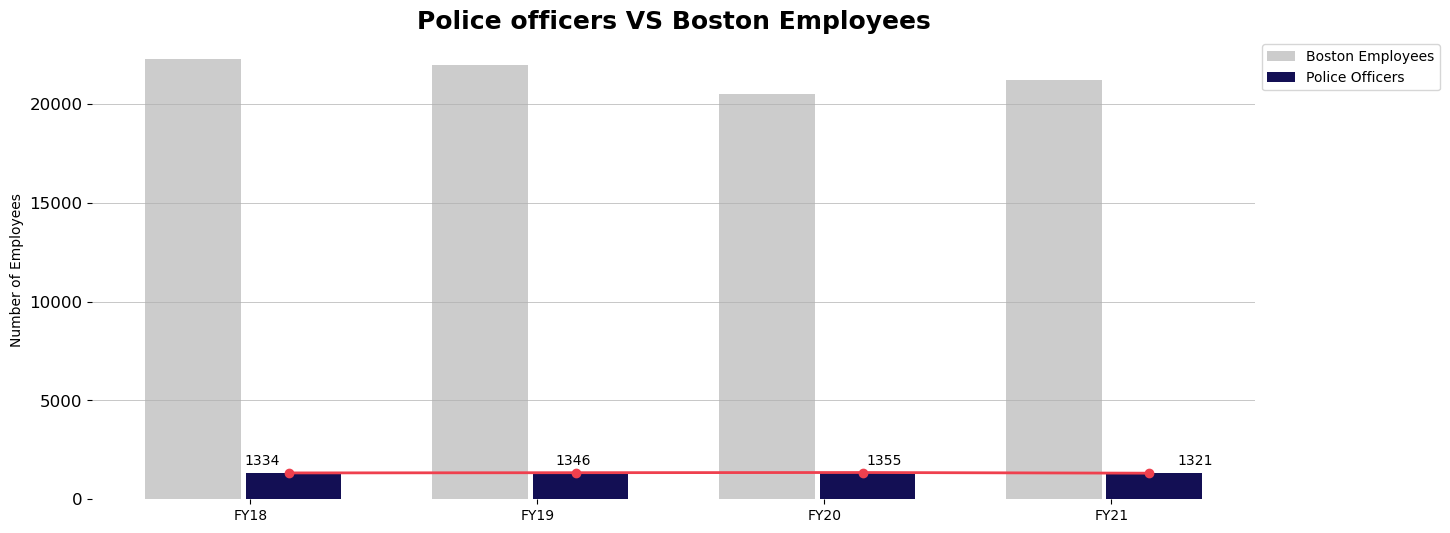

In [547]:
import numpy as np
import matplotlib.pyplot as plt
from array import array

employees = ['Boston Employees', 'Police Officers']
fy21_emp = [22551-1321,1321]
fy20_emp = [21857-1355,1355]
fy19_emp = [23311-1346, 1346]
fy18_emp = [23604-1334,1334]

years = ['FY18', 'FY19', 'FY20', 'FY21']
data = [fy18_emp,fy19_emp,fy20_emp,fy21_emp]
j=0
for i in range(18,22):
    print("FY:",i,data[j])
    j=j+1

# Define colors
colors = [ '#CCCCCC', '#FCAA17']

# Plot
fig, ax = plt.subplots(figsize=(15, 6))

for i, dept in enumerate(employees):
    if dept == 'Police Officers':
        ax.bar([j*0.6+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color='#130F54')
        x_vals =([j*0.6+0.2 for j in range(len(years))])
        y_vals = [data[j][i] for j in range(len(years))]
        print(y_vals)
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax.plot(x_vals, y_vals, '-o', color='#EF404E', linewidth=2) # Add trend line to personnel services bars

    else:
        ax.bar([j*0.6+i*0.21 for j in range(len(years))], [data[j][i] for j in range(len(years))], width=0.2, label=dept, color=colors[0])
        
'''
x = np.arange(len(labels))
z = np.polyfit(x, data, 1)
p = np.poly1d(z)'''



# Highlight bar values
for i, v in enumerate(y_vals):
    #ax.text(i*0.6, v+2.5**7, "${:,.2f}".format(v)+"M", ha='center', fontsize=10)
    ax.text(i*0.65+0.145, v*1.3, str(y_vals[i]), ha='center', fontsize=10)

        
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
# Add labels and title
ax.set_xticks([j*0.6+0.12 for j in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Number of Employees ')
ax.set_title('Police officers VS Boston Employees',fontweight='bold',fontsize=18)

# Y-axis ticks and grid
ax.set_yticks(np.arange(0, 25000, 5000))
ax.set_yticklabels(['0','5000', '10000', '15000', '20000'], fontsize=12)
plt.grid(axis='y', linewidth=0.5)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('q5b.png', dpi=300, bbox_inches='tight')

plt.show()
